<a href="https://colab.research.google.com/github/shubhammittal009/ml_cb/blob/master/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.layers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

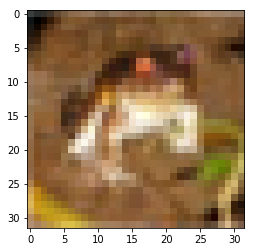

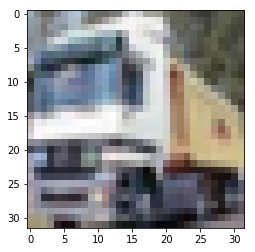

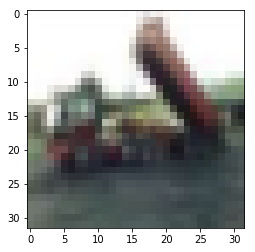

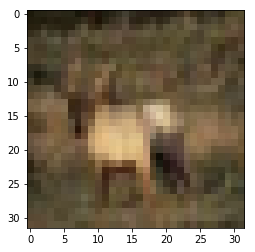

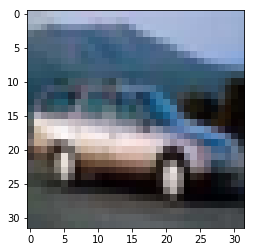

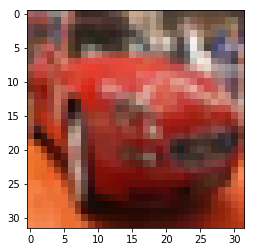

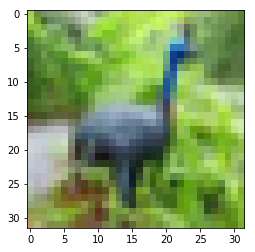

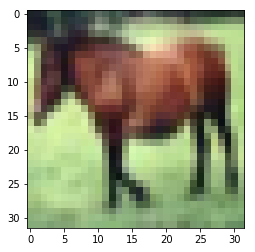

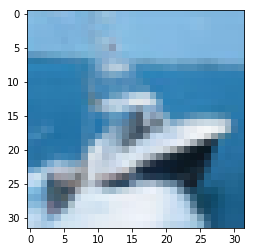

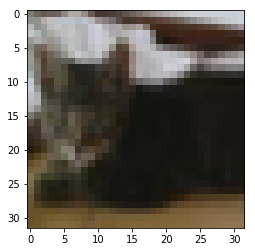

In [5]:
for xi in range(10):
    plt.axis = False
    x = x_train[xi].reshape(32,32,3)
    plt.imshow(x)
    plt.show()

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [0]:
from keras.utils import to_categorical

In [0]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [9]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential

In [11]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation= 'relu',input_shape =(32,32,3)))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10,activation='softmax'))    

model.summary()

W0724 08:01:06.552875 139861707949952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 08:01:06.573771 139861707949952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 08:01:06.577462 139861707949952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 08:01:06.596576 139861707949952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0724 08:01:06.599805 139861707949952 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
__________

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

W0724 08:01:06.715418 139861707949952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 08:01:06.748775 139861707949952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
hist = model.fit(x_train,y_train,batch_size=256,epochs=20,verbose=True,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 55s 1ms/step - loss: 1.2935 - acc: 0.5415 - val_loss: 1.2481 - val_acc: 0.5653
Epoch 2/20
40000/40000 [==============================] - 55s 1ms/step - loss: 1.2071 - acc: 0.5741 - val_loss: 1.1728 - val_acc: 0.5929
Epoch 3/20
40000/40000 [==============================] - 55s 1ms/step - loss: 1.1567 - acc: 0.5954 - val_loss: 1.1332 - val_acc: 0.6069
Epoch 4/20
40000/40000 [==============================] - 55s 1ms/step - loss: 1.1072 - acc: 0.6144 - val_loss: 1.0741 - val_acc: 0.6313
Epoch 5/20
40000/40000 [==============================] - 55s 1ms/step - loss: 1.0599 - acc: 0.6323 - val_loss: 1.0514 - val_acc: 0.6301
Epoch 6/20
40000/40000 [==============================] - 55s 1ms/step - loss: 1.0266 - acc: 0.6435 - val_loss: 1.0110 - val_acc: 0.6491
Epoch 7/20
40000/40000 [==============================] - 56s 1ms/step - loss: 0.9907 - acc: 0.6568 - val_loss: 0.9860 - val_acc

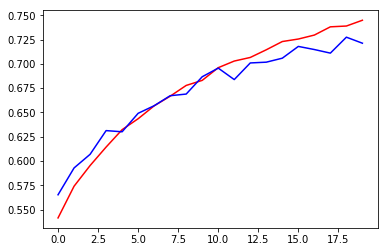

In [18]:
plt.figure()
plt.plot(hist.history['acc'],c='r')
plt.plot(hist.history['val_acc'],c='b')

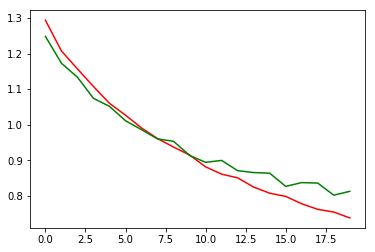

In [20]:
plt.figure()
plt.plot(hist.history['loss'],c='r')
plt.plot(hist.history['val_loss'],c='g')